## Here I have taken total 34799 images of different traffic signals & made an LENET like model to make an Traffic Signal Detecter using OpenCV

#### Importing Required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.utils.np_utils import to_categorical
from keras.optimizers import Adam
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import cv2
import h5py
import os
import random

In [7]:
path = 'myData'
labelFile = 'labels.csv'

#### Importing Images

In [8]:
count = 0
images = []
classNo = []
myList = os.listdir(path)
No_of_class = len(myList)

for x in range(No_of_class):
    PicList = os.listdir(path+'/'+str(count))
    for y in PicList:
        curImg = cv2.imread(path+'/'+str(count)+'/'+y)
        images.append(curImg)
        classNo.append(count)
    count+=1
    
print("NO. of Classes :",No_of_class)

NO. of Classes : 43


In [9]:
print('Total No. of Images:',len(images))

Total No. of Images: 34799


In [10]:
images = np.array(images)
classNo = np.array(classNo)

In [11]:
images.shape

(34799, 32, 32, 3)

In [12]:
len(classNo)

34799

#### Looking for few images

 Few Traffic Signals Images are...


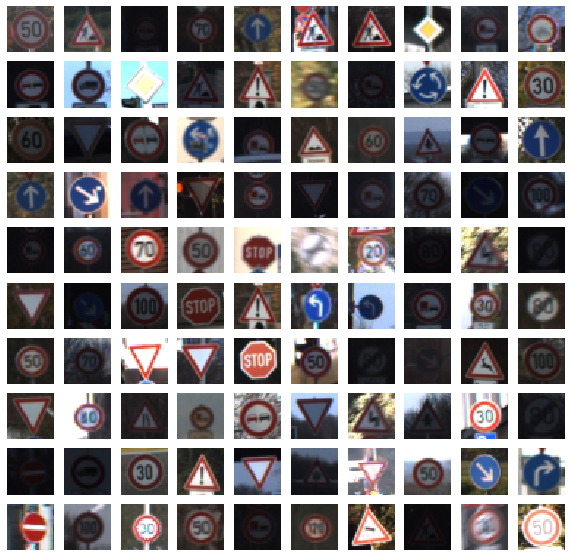

In [161]:
print(' Few Traffic Signals Images are...')
fig, axes = plt.subplots( 10,10,figsize = (10,10))
for row in axes:
    for axe in row:
        index = np.random.randint(len(classNo))
        axe.imshow(images[index], cmap='gray')
        axe.set_axis_off()

#### Splitting Data Sets into three parts -> train sets, test sets & validation sets

In [13]:
xtrain, xtest,ytrain,ytest = train_test_split(images,classNo,test_size=0.2,
                                              stratify=classNo)

In [14]:
xtrain,x_val,ytrain,y_val = train_test_split(xtrain,ytrain,test_size=0.2,
                                              stratify=ytrain)

In [15]:
print("DATA SHAPES...")
print("Train Sets      :",len(ytrain))
print("Test Sets       :",len(ytest))
print("Validation Sets :",len(y_val))

DATA SHAPES...
Train Sets      : 22271
Test Sets       : 6960
Validation Sets : 5568


DATA DISTRIBUTION...


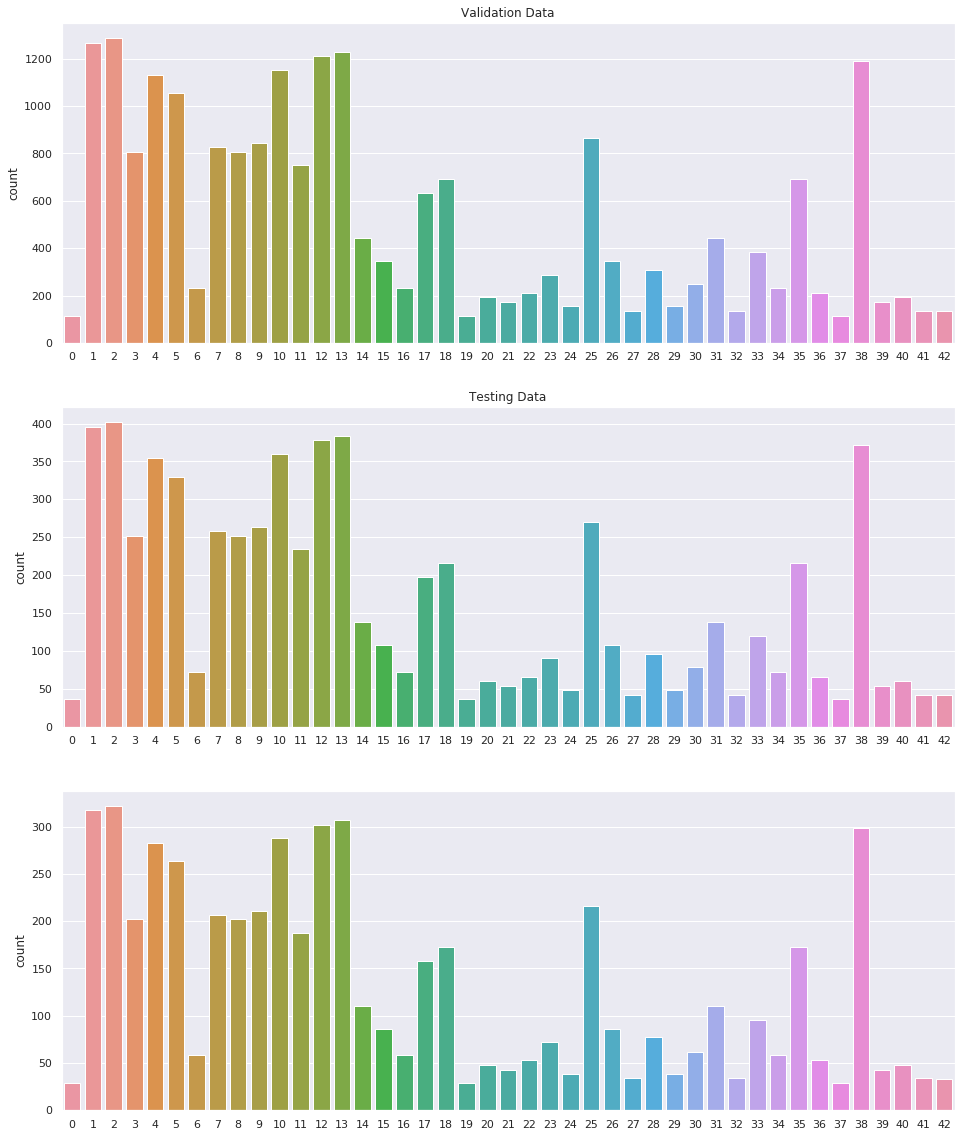

In [118]:
print("DATA DISTRIBUTION...")
f,(ax1,ax2,ax3) = plt.subplots(3,1,figsize=(16,20))
sns.countplot(ytrain,ax=ax1)
ax1.set_title("Training Data")
sns.countplot(ytest,ax=ax2)
ax2.set_title("Testing Data")
sns.countplot(y_val,ax=ax3)
ax1.set_title("Validation Data")
plt.show()

#### Data label 

In [16]:
label = pd.read_csv(labelFile)
label

,ClassId,Name
0,0,Speed limit (20km/h)
1,1,Speed limit (30km/h)
2,2,Speed limit (50km/h)
3,3,Speed limit (60km/h)
4,4,Speed limit (70km/h)
5,5,Speed limit (80km/h)
6,6,End of speed limit (80km/h)
7,7,Speed limit (100km/h)
8,8,Speed limit (120km/h)
9,9,No passing


In [120]:
xtrain.shape

(22271, 32, 32, 3)

#### Prosessing pipeline

In [17]:
def grayScale(img):
    img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    return img
    
def equalize(img):
    img = cv2.equalizeHist(img)
    return img

def preprossesing(img):
    img = grayScale(img)
    img = equalize(img)
    img = img/255
    return img

In [18]:
Xtrain = np.array(list(map(preprossesing,xtrain)))
Xtest = np.array(list(map(preprossesing,xtest)))
X_val = np.array(list(map(preprossesing,x_val)))

#### Processed Images

In [19]:
Xtrain.shape,Xtest.shape,X_val.shape

((22271, 32, 32), (6960, 32, 32), (5568, 32, 32))

#### Adding depth in the images

In [20]:
Xtrain = Xtrain.reshape(-1,32,32,1)
Xtest = Xtest.reshape(-1,32,32,1)
X_val = X_val.reshape(-1,32,32,1)

In [21]:
Xtrain.shape,Xtest.shape,X_val.shape

((22271, 32, 32, 1), (6960, 32, 32, 1), (5568, 32, 32, 1))

#### Data Augmentation for training datasets..

In [126]:
dataGen = ImageDataGenerator(width_shift_range=0.1,height_shift_range=0.1,
                            zoom_range=0.2,shear_range=0.1,rotation_range=10)
dataGen.fit(Xtrain)
#batches = dataGen.flow(Xtrain,ytrain,batch_size=32)
#X_batch, y_batch = next(batches)

#### Making proper categorical form to each y-data sets for training..

In [22]:
y_train = to_categorical(ytrain,No_of_class)
y_test = to_categorical(ytest,No_of_class)
y_val = to_categorical(y_val,No_of_class)

In [23]:
y_train[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

#### Making LeNet like Model

In [129]:
def Model():
    model = Sequential()
    ### Conv layers
    model.add(Conv2D(60,kernel_size=5,input_shape=(32,32,1),activation='relu'))
    model.add(Conv2D(60,kernel_size=5,activation='relu'))
    model.add(MaxPooling2D(2,2))
    model.add(Conv2D(30,kernel_size=3,activation='relu'))
    model.add(Conv2D(30,kernel_size=3,activation='relu'))
    model.add(MaxPooling2D(2,2))
    model.add(Dropout(0.5))
    ### Dense layers
    model.add(Flatten())
    model.add(Dense(500,activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(43,activation='softmax'))
    ###Compiling Model
    model.compile(Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])
    return model
    

#### Model structure

In [131]:
model = Model()
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 28, 28, 60)        1560      
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 24, 24, 60)        90060     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 12, 12, 60)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 10, 10, 30)        16230     
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 8, 8, 30)          8130      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 4, 4, 30)          0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 4, 4, 30)         

#### training of the model

In [132]:
epochs = 20

In [133]:
hist=model.fit_generator(dataGen.flow(Xtrain,y_train,batch_size=32),
                           steps_per_epoch=2000,epochs=epochs,
                         validation_data=(X_val,y_val),
                           shuffle=True)

Epoch 1/20
2000/2000 [==============================] - 305s 152ms/step - loss: 1.4415 - accuracy: 0.5803 - val_loss: 0.1872 - val_accuracy: 0.9467
Epoch 2/20
2000/2000 [==============================] - 319s 159ms/step - loss: 0.5117 - accuracy: 0.8389 - val_loss: 0.0806 - val_accuracy: 0.9759
Epoch 3/20
2000/2000 [==============================] - 319s 159ms/step - loss: 0.3526 - accuracy: 0.8895 - val_loss: 0.0871 - val_accuracy: 0.9736
Epoch 4/20
2000/2000 [==============================] - 325s 162ms/step - loss: 0.2892 - accuracy: 0.9115 - val_loss: 0.0485 - val_accuracy: 0.9858
Epoch 5/20
2000/2000 [==============================] - 329s 164ms/step - loss: 0.2529 - accuracy: 0.9216 - val_loss: 0.0271 - val_accuracy: 0.9919
Epoch 6/20
2000/2000 [==============================] - 320s 160ms/step - loss: 0.2302 - accuracy: 0.9285 - val_loss: 0.0327 - val_accuracy: 0.9898
Epoch 7/20
2000/2000 [==============================] - 324s 162ms/step - loss: 0.2051 - accuracy: 0.9380 - val_

#### Scores of the model

In [134]:
valLoss = hist.history['val_loss']
loss = hist.history['loss']
accu = hist.history['accuracy']
val_acc = hist.history['val_accuracy']

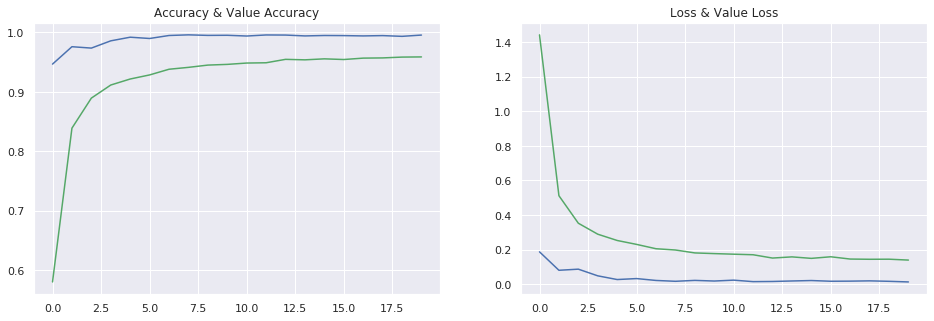

In [135]:
f,(ax1,ax2) = plt.subplots(1,2,figsize=(16,5))
ax1.plot(np.arange(epochs),accu,color='g')
ax1.plot(np.arange(epochs),val_acc,color='b')
ax1.set_title('Accuracy & Value Accuracy')
ax2.plot(np.arange(epochs),loss,color='g')
ax2.plot(np.arange(epochs),valLoss,color='b')
ax2.set_title('Loss & Value Loss')
sns.set_style('darkgrid')
plt.show()

In [136]:
score = model.evaluate(Xtest,y_test,verbose=0)

In [137]:
print('Total test sample       :',len(y_test))
print('Accuracy with Test Data :',round(score[1]*100,2),'%')
print('Loss with Test Data     :',round(score[0],3))

Total test sample       : 6960
Accuracy with Test Data : 99.53 %
Loss with Test Data     : 0.021


#### Saving trained model

In [162]:
model.save('Traffic_model.h5')

#### Few Predictions with trained model

In [143]:
def prediction(Xtest,y_test,index=0):
    try:
        pred = np.argmax(model.predict(Xtest[index].reshape(-1,32,32,1)))
        lbl = label['Name']
        p = lbl[pred]
        y = lbl[np.argmax(y_test[index])]
        print(f'Original Signal is  | {y}')
        print(f'Predicted Signal is | {p}')
    except:
        print("Index Error...")
        print(f"Enter Index within :{len(y_test)-1}")

In [144]:
prediction(Xtest,y_test,index=100)

Original Signal is  | Speed limit (70km/h)
Predicted Signal is | Speed limit (70km/h)


In [145]:
prediction(Xtest,y_test,index=6000)

Original Signal is  | Ahead only
Predicted Signal is | Ahead only


In [146]:
prediction(Xtest,y_test,index=7000)

Index Error...
Enter Index within :6959


In [151]:
prediction(Xtest,y_test,index=6959)

Original Signal is  | Right-of-way at the next intersection
Predicted Signal is | Right-of-way at the next intersection


In [157]:
prediction(Xtest,y_test,index=980)

Original Signal is  | Go straight or left
Predicted Signal is | Go straight or left


### Now I will go to apply this model in a live web cam with opencv into next part of this project